In [4]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting

h5_file_path = "/home/rebeccaz/Github/vampires_calibration/mcmc/results/610nm.h5"
txt_file_path = "/home/rebeccaz/Github/vampires_calibration/scipy_minimize/data_files/produced/675-50nm_no_IMR_offset_or_IMR_and_HWP_constraints.txt"


Chain shape (nsteps, nwalkers, ndim): (200000, 28, 13)


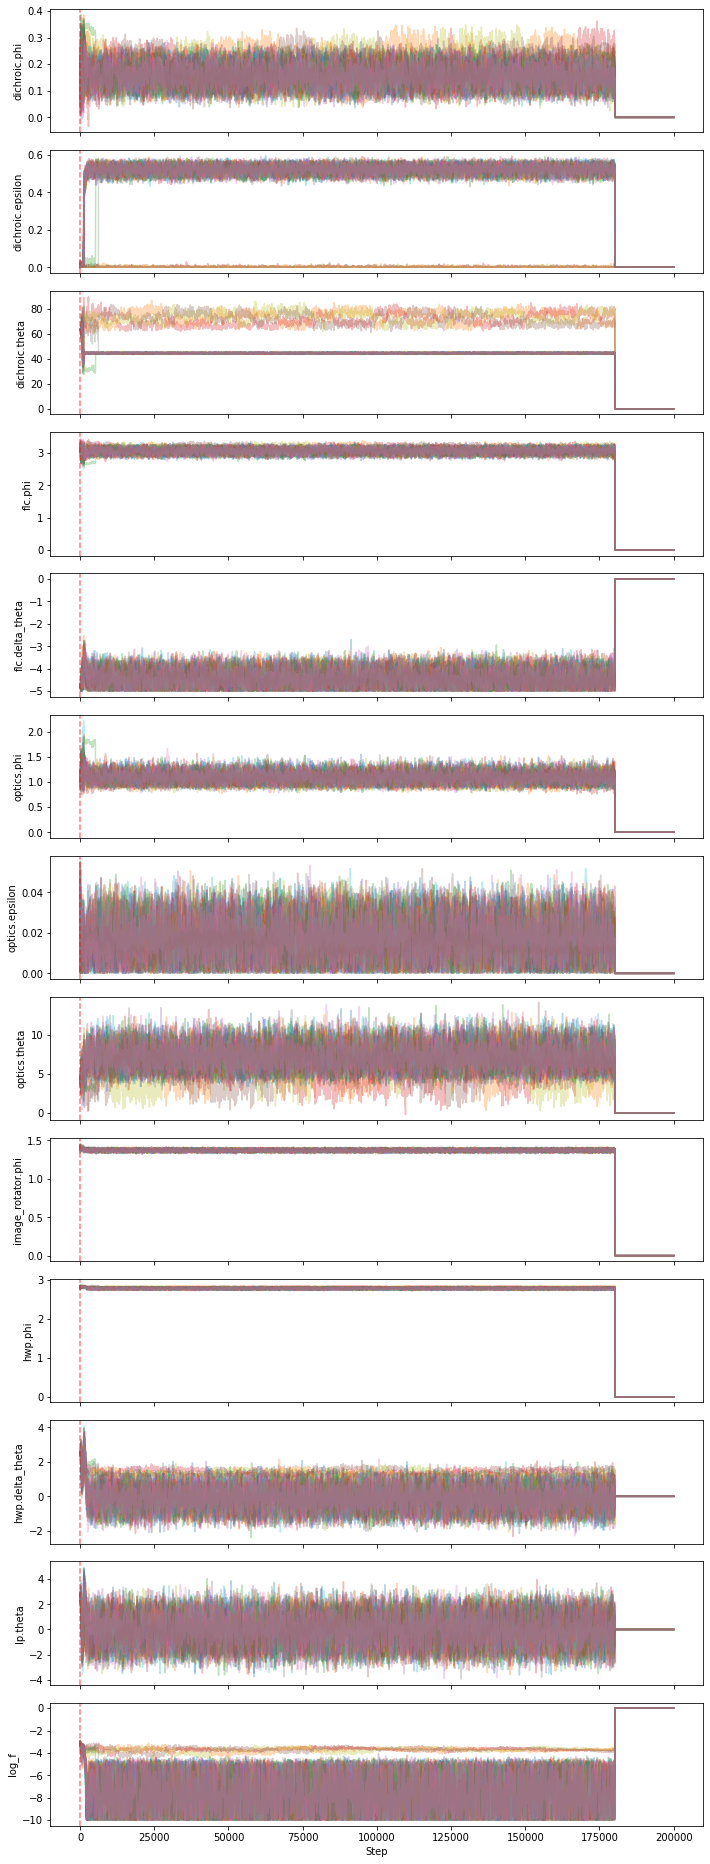

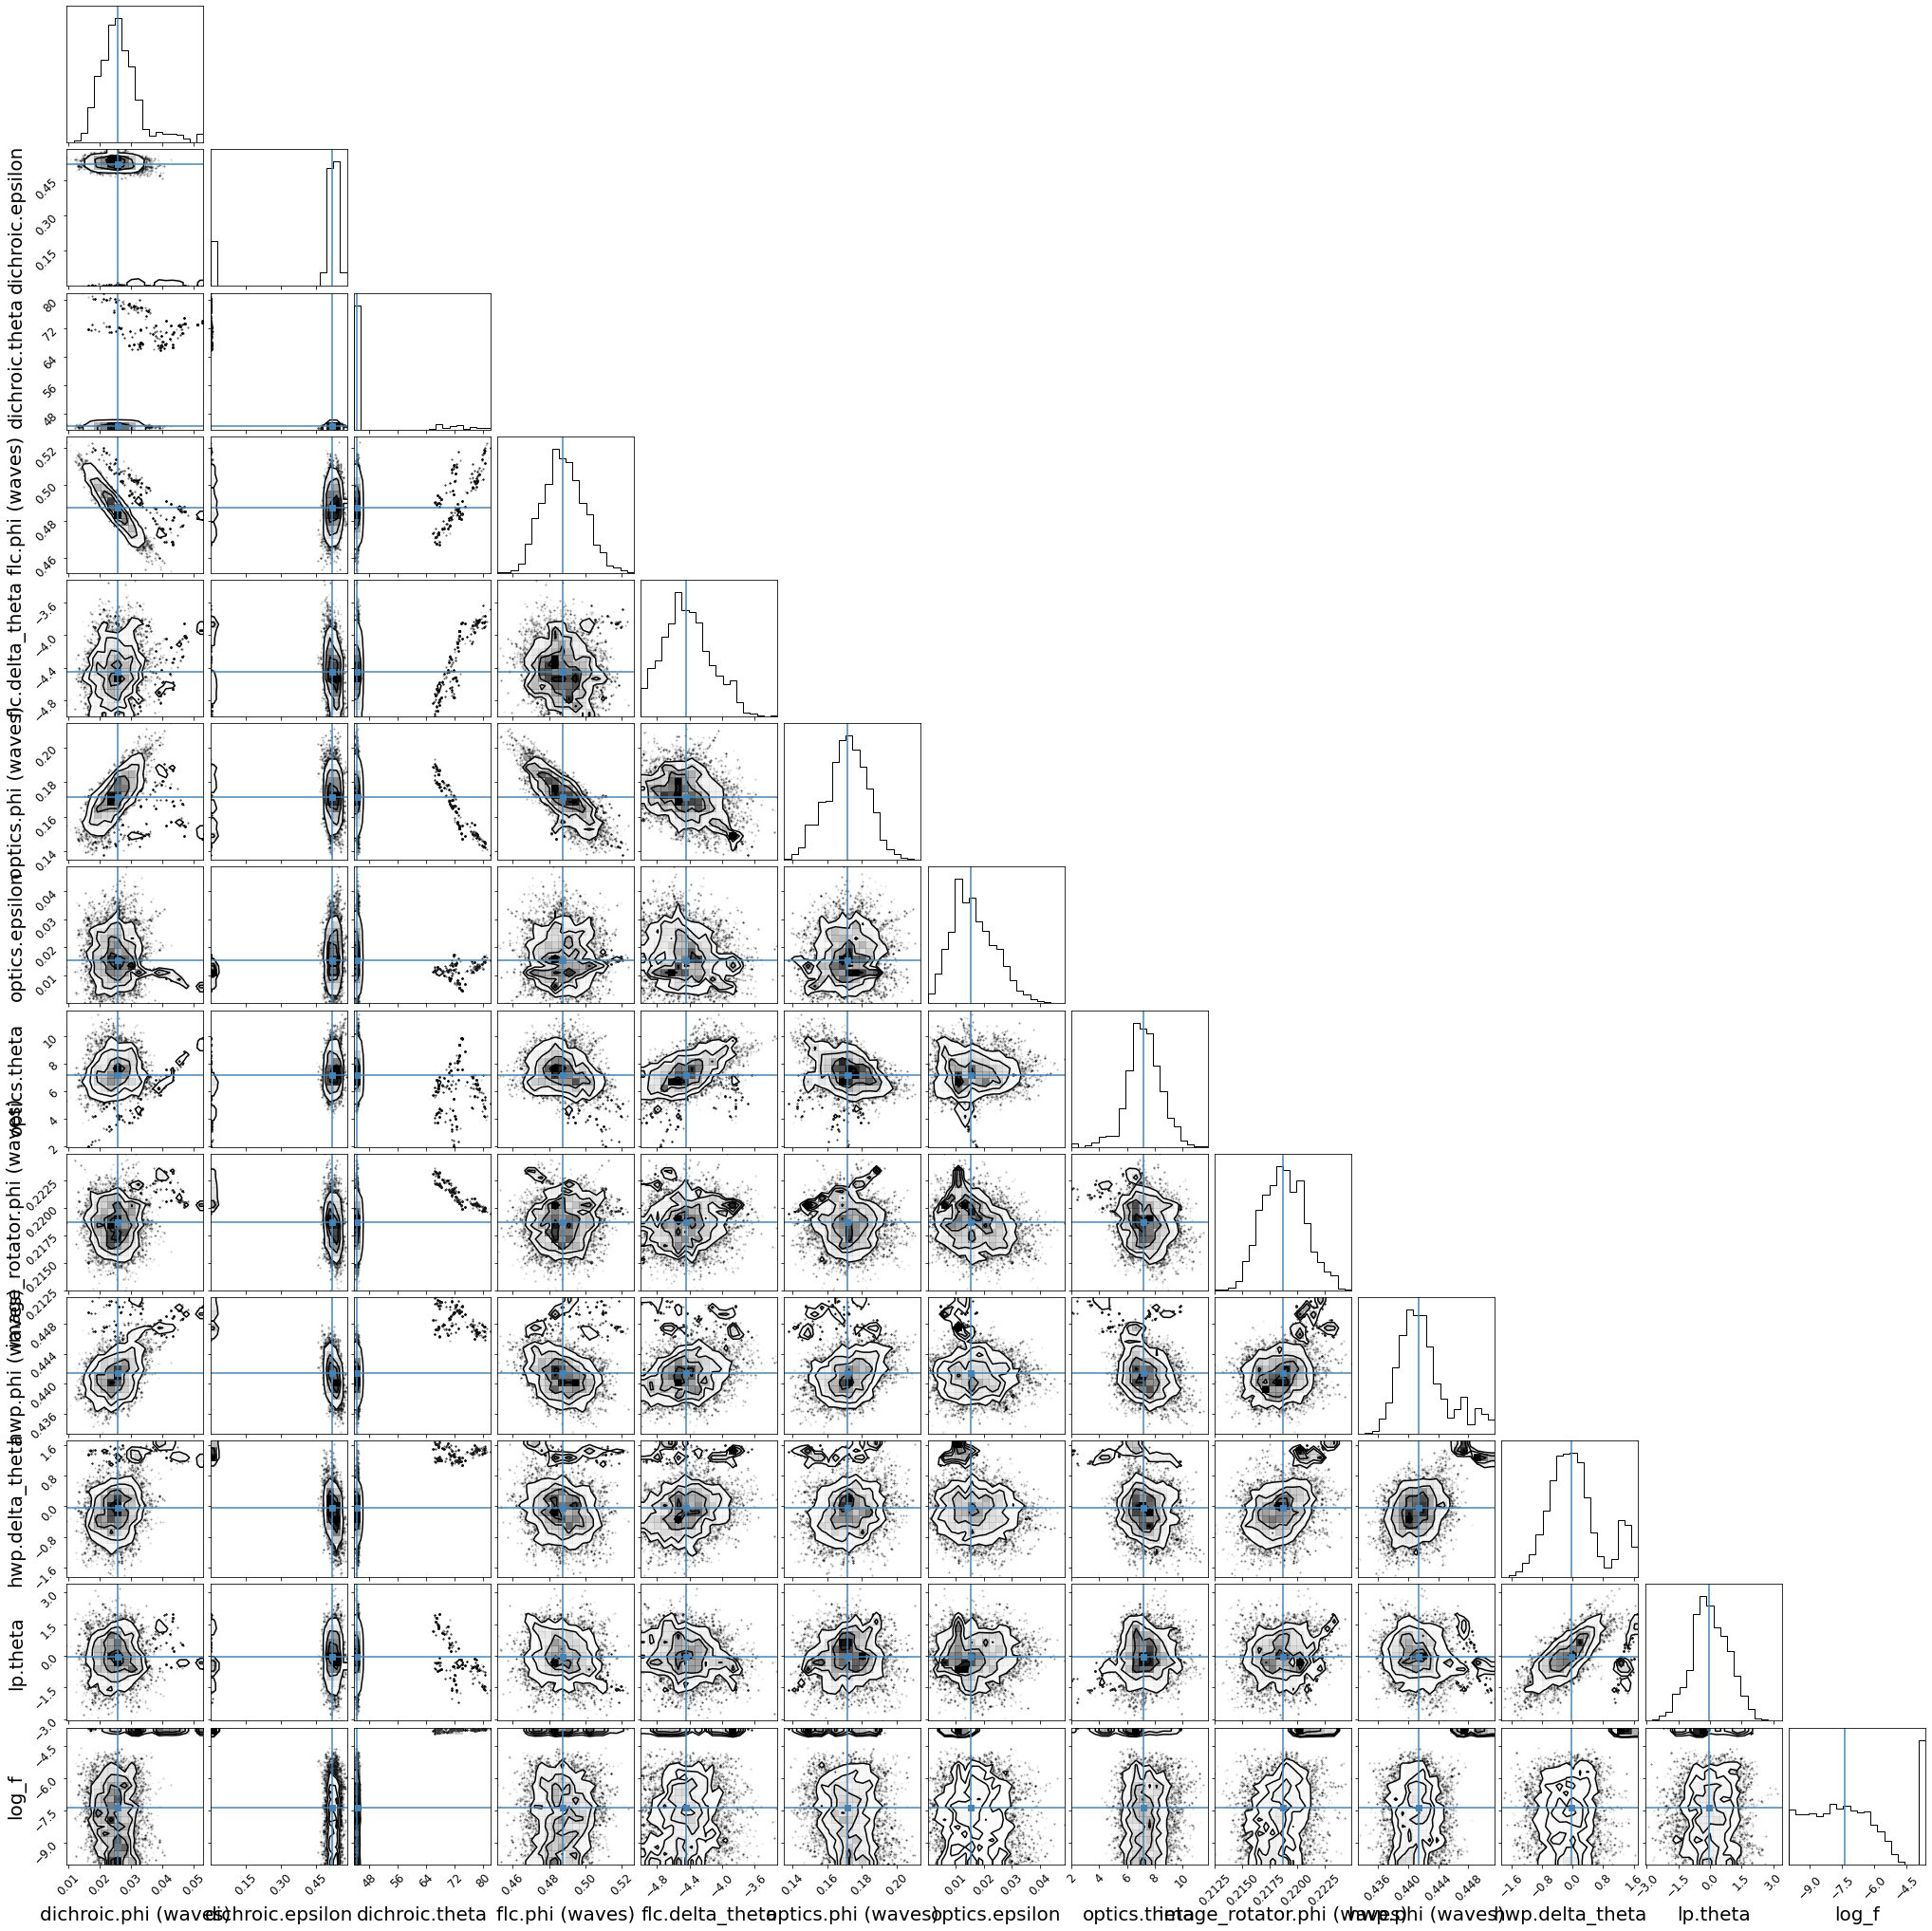

dichroic.phi (waves): 0.02564 ± 0.00667
dichroic.epsilon: 0.51828 ± 0.18271
dichroic.theta: 44.52537 ± 9.88045
flc.phi (waves): 0.48731 ± 0.01099
flc.delta_theta: -4.44664 ± 0.29103
optics.phi (waves): 0.17147 ± 0.01190
optics.epsilon: 0.01553 ± 0.00770
optics.theta: 7.19032 ± 1.25828
image_rotator.phi (waves): 0.21873 ± 0.00191
hwp.phi (waves): 0.44145 ± 0.00333
hwp.delta_theta: -0.02977 ± 0.70078
lp.theta: -0.03980 ± 0.88090
log_f: -7.37928 ± 1.85135


In [5]:
chain, names = plotting.load_chain_and_labels(h5_file_path, txt_file_path, include_logf = True)
all_step_range = (0, None)
corner_plot_step_range = (175000, 176000)

# Optional: Check chain shape after loading
print("Chain shape (nsteps, nwalkers, ndim):", chain.shape)

# Plot trace plots for MCMC chains
plotting.plot_trace(chain, names, step_range=all_step_range, max_walkers=100)

# Plot corner plot from flattened chain
plotting.plot_corner_flat(chain, names, step_range=corner_plot_step_range)

# Print median ± std for each parameter
plotting.summarize_posteriors(chain, names, step_range=corner_plot_step_range)


# Plotting Random Chains for Fitting 

In [7]:
import sys
import os

# Add the directory containing instruments.py to the Python path
custom_module_path = "/home/rebeccaz/Github/vampires_calibration"
sys.path.append(custom_module_path)

import plotting_rewrite as plotting
import numpy as np

all_step_range = (0, None)
corner_plot_step_range = (24000, 25000)

# Define the system configuration dictionary
system_dict = {
    "components": {
        "wollaston": {
            "type": "wollaston_prism_function",
            "properties": {"beam": "o", "transmission_ratio": 1.18},
        },
        "dichroic": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "flc": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "optics": {
            "type": "diattenuator_retarder_function",
            "properties": {"phi": 0, "epsilon": 0, "theta": 0},
        },
        "image_rotator": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5 * 2 * np.pi, "theta": 0, "delta_theta": 0},
        },
        "hwp": {
            "type": "general_retarder_function",
            "properties": {"phi": 0.5, "theta": 0, "delta_theta": 0},
        },
        "lp": {
            "type": "general_linear_polarizer_function_with_theta",
            "properties": {"theta": 0},
        },
    }
}

# Input paths and call plotting function
h5_filename = "675nm_no_IMR_offset_with_dichroic.h5"
txt_filename = "675-50nm.txt"
csv_file_path = "/home/rebeccaz/Github/vampires_calibration/data/20230914_processed_table.csv"

plotting.plot_mcmc_fits_double_diff_sum(
    h5_filename=h5_filename,
    txt_filename=txt_filename,
    csv_path=csv_file_path,
    filter_wavelength="675-50",
    system_dict=system_dict,
    wavelength_str="675nm",
    n_samples=50,
    step_range = all_step_range
)


IndexError: index 11 is out of bounds for axis 0 with size 11